In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

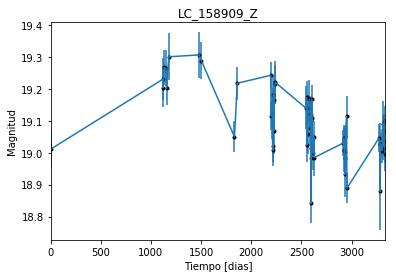

In [2]:
data = np.genfromtxt('LC_158909_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_158909_Z')
plt.savefig("LC_158909_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

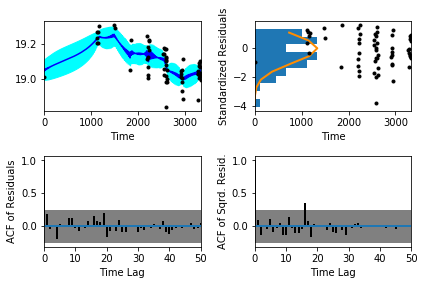

In [5]:
sample.assess_fit()

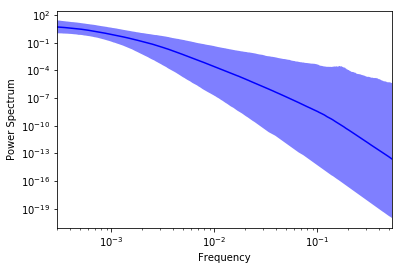

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

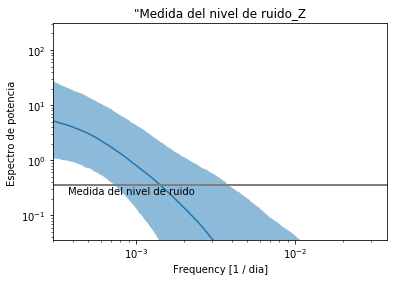

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_158909_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_158909_Z')

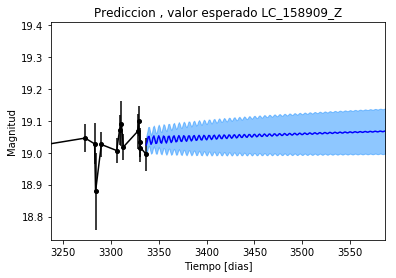

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_158909_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_158909_Z')

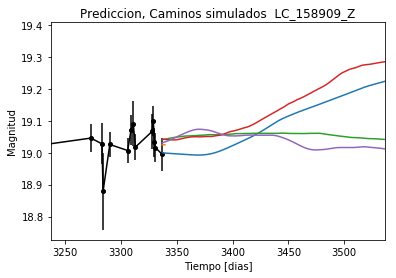

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_158909_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


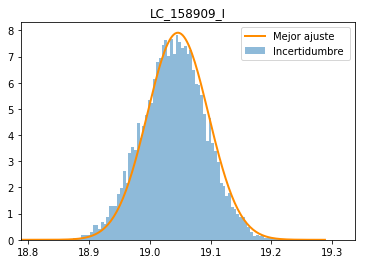

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_158909_I')
plt.savefig("Mejor_ajuste_LC_158909_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_158909_Z')

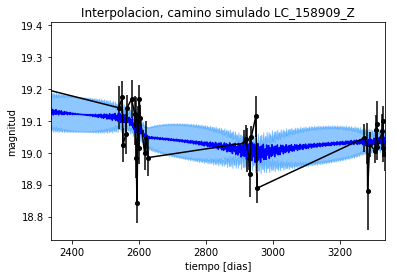

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_158909_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_158909_Z')

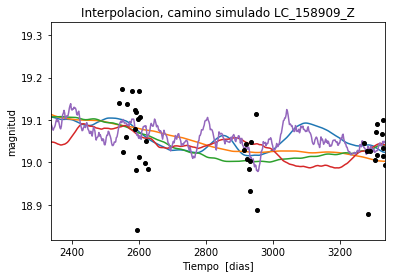

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_158909_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 906.416295035
Median: 0.00857508120539
Standard deviation: 0.195251325835
68% credibility interval: [ 0.00077765  0.16487367]
95% credibility interval: [  3.50564213e-04   7.61082355e-01]
99% credibility interval: [  3.08111743e-04   9.99526955e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 691.239880062
Median: 0.0011880822887
Standard deviation: 0.0701901628872
68% credibility interval: [ 0.0004007   0.01560852]
95% credibility interval: [ 0.00031191  0.18324222]
99% credibility interval: [  3.01090353e-04   5.06036101e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 493.21356959
Median: 0.0250586072963
Standard d

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1128.65600686
Median: 95.6338371528
Standard deviation: 1.6227155221
68% credibility interval: [ 93.8654661   96.83508434]
95% credibility interval: [ 91.31242447  97.58172414]
99% credibility interval: [ 89.4681486   98.14378396]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 515.985766557
Median: 0.690545366542
Standard deviation: 2.12280205881
68% credibility interval: [ 0.06283705  3.60768962]
95% credibility interval: [ 0.0133645   7.36433619]
99% credibility interval: [  9.61503518e-03   1.03098329e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 317.138041526
Median: 0.197198632247
Standard deviation: 8.69312793327
68% credibility interval: [ 0.00612694  6.04017476]
95% credibility interval: [  3.9

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.036077
Median: 9.91277895875e-46
Standard deviation: 2.10586400489e+38
68% credibility interval: [  6.36962322e-99   1.57547889e-13]
95% credibility interval: [  1.23420708e-143   1.48241817e-001]
99% credibility interval: [  6.60225776e-164   8.07048495e+001]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 4065.54229827
Median: 19.1078113164
Standard deviation: 0.060149154637
68% credibility interval: [ 19.05746888  19.1564644 ]
95% credibility interval: [ 18.98230885  19.21925532]
99% credibility interval: [ 18.90241659  19.28373665]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 200.10354585
Median: 0.00120513499784
Standard deviation: 0.23194923602
68% credibility interval: [ 0.          0.26185239]
95% credibility interval: [ 0.          0.88786384]
99% credibility interval: [ 0.          1.03740938]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 200.10354585
Median: 0.00120513499784
Standard deviation: 0.23194923602
68% credibility interval: [ 0.          0.26185239]
95% credibility interval: [ 0.          0.88786384]
99% credibility interval: [ 0.          1.03740938]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2343.15651074
Median: 0.0
Standard deviation: 0.000308511199182
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1128.65600686
Median: 95.6338371528
Standard deviation: 1.6227155221
68% credibility interval: [ 93.8654661   96.83508434]
95% credibility interval: [ 91.31242447  97.58172414]
99% credibility interval: [ 89.4681486   98.14378396]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1858.11025591
Median: 0.00961237579193
Standard deviation: 0.0135488326665
68% credibility interval: [ 0.00509506  0.02001499]
95% credibility interval: [ 0.00276778  0.0431651 ]
99% credibility interval: [ 0.00200665  0.08995785]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1362.90243656
Median: 1.33194931132
Standard deviation: 0.196665651783
68% credibility interval: [ 1.14927894  1.54469763]
95% credibility interval: [ 1.00191707  1.76137965]
99% credibility interval: [ 0.89571136  1.89848913]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1157.77487806
Median: 1.85959770786e-05
Standard deviation: 0.117266998638
68% credibility interval: [  2.10707010e-07   2.91402600e-03]
95% credibility interval: [  6.28689380e-09   1.87526839e-01]
99% credibility interval: [  7.50925833e-10   6.32363269e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 906.416295035
Median: (-0.0538788242376-0.873828916828j)
Standard deviation: 1.90499224122
68% credibility interval: [-1.03593183-1.481758j   -0.00488615-0.02240126j]
95% credibility interval: [ -4.78202147e+00+0.j          -2.20265991e-03-0.01563674j]
99% credibility interval: [ -6.28021308e+00+0.j          -1.93592318e-03-0.38042902j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 691.239880062
Median: (-0.0074649411801+0.000404847405924j)
Standard deviation: 1.52264679328
68% credibility interval: [-0.09807124+1.66424049j -0.00251766+0.j        ]
95% credibility interval: [-1.1513448 +5.49731612e+00j -0.0019598 +1.46374767e-03j]
99% credibility interval: [ -3.17951859e+00+0.9978004j  -1.89180648e-03+0.j       ]
Pos